We use a density distribution that drops off as $r^{-2}$, following a power law profile. This relationship is more common in density structure created by a Type II presupernova mass-loss.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unt
from matplotlib import rc, rcParams

Radius from the center of the explosion.

In [85]:
pos_x = np.linspace(0.1, 6, 100)
pos_y = np.linspace(0.1, 6, 100)
pos_z = np.linspace(0.1, 6, 100)

def radius(a, b, c):
    r = np.sqrt(a**2 + b**2 + c**2)
    return r

rad = radius(pos_x, pos_y, pos_z)


density of the circumstellar medium is given by
\begin{equation}
\rho_{cs} = \frac{\dot{M}}{4\pi u_w r^2}
\end{equation}

In [86]:
dM = 6*10**(-5) #Msol/yr
u_w = 10 #KM/S
r = rad
den = dM/(4*np.pi*u_w*r)

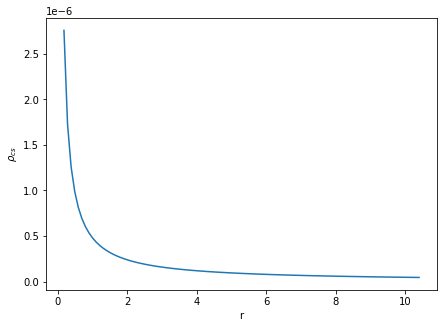

In [87]:
fig, ax = plt.subplots(1, figsize=(7, 5))
ax.plot(r, den)
ax.set_xlabel(r'r')
ax.set_ylabel(r'$\rho_{cs}$')
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')

For the specific self-similar case we consider, $n=12$ and $s=2$ and we set $\gamma$=2. Thus $m =(n-3)/(n-s)$ 

In [88]:
# All the observation dependent parameters

beta = -0.78
delta = -2.96
alpha = -0.74
gamma = 2.5
m = -delta/3

Calculating the the optical depth of the shocked medium 

In [99]:
t = np.linspace(10, 250, 100) #days
freq = 15 #GHz
eta = -(gamma - 7 + 12*m) / 4
b = -(gamma - 5 + 6*m) / 2
a = (1 - gamma) / 2

Calculating the optical depth from the emission of the shocked material.

In [100]:
tau = (freq**(-2.1)) * (t**delta) * (dM/(4*np.pi*u_w*r))**(5-delta)

Calculating the radio flux density from the emission of the shocked material.

In [101]:
S_v = (freq**a) * (t**b) * (dM/(4*np.pi*u_w*r))**eta * np.exp(-tau)


100


Text(0,0.5,'$S(\\nu)$')

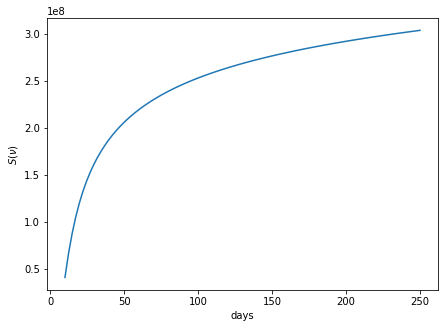

In [102]:
fig, ax = plt.subplots(1, figsize=(7, 5))
ax.plot(t, S_v)
ax.set_xlabel("days")
ax.set_ylabel(r"$S(\nu)$")